### Assignment 3: Loan Application Status Prediction

## Problem Statement

In this project, we aim to predict whether a loan application will be approved or not based on various features provided in the dataset. This is a binary classification problem where we need to build a model that can accurately classify loan applications as either approved or not approved.


## Dataset

The dataset for this project contains information about loan applicants, including their gender, marital status, education, income, credit history, and more. The target variable is 'Loan_Status', which indicates whether a loan was approved or not.

## Approach

We'll follow a standard machine learning workflow to tackle this problem:

1. **Data Exploration:** Explore the dataset to understand its structure, features, and distribution of the target variable.

2. **Data Preprocessing:** Preprocess the data to handle missing values, encode categorical variables, and scale numerical features.

3. **Using Label ENcoder for converting categorical to numerical:** Choose an appropriate machine learning algorithm for binary classification. We'll start with Logistic Regression.

4. **Model Selection and Evaluation:** Train the selected model on the preprocessed data. Evaluate the trained model's performance using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC score.



In [87]:
# Importing libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset 

url = "https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv"
data = pd.read_csv(url)

## 2. Data Exploration

- 2.1 explore data table 
- 2.2 Conducted any necessary data cleaning steps.
- 2.3 Explore Target variable, Features, their distribution and Outliers
- 2.4 Correlation matrix and Heatmap
- 2.5 Split the data into features (X), target variable (y), training and testing sets for model evaluation.


### 2.1 Explore data table

In [66]:
# Print out the contents of the DataFrame to check its structure
print(data.head())


# Check the column names to ensure they match the expected column names
print(data.columns)


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [67]:
print(data.shape)

(614, 13)


In [68]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [69]:
data['Loan_Amount_Term'].nunique()

10

In [70]:
data['Dependents'].nunique()

4

In [71]:
data['LoanAmount'].nunique()

203

In [46]:
data['Credit_History'].value_counts()

1.0    513
0.0    101
Name: Credit_History, dtype: int64

In [72]:
columns=['Loan_Amount_Term',"Dependents",'Credit_History',]

### 2.2 Conducting any necessary data cleaning steps

In [73]:
# Handling missing values
data.isnull().sum()

for col in columns:
    data[col].fillna(data[col].mode()[0], inplace=True)
    
data.isnull().sum()
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)

In [74]:
# dropping unnecessary columns
data.drop(['Loan_ID'],axis=1,inplace=True)

In [75]:
data.shape

(614, 12)

In [76]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [77]:

# Frequency counts for categorical features
print("\nFrequency counts for categorical features:")
print(data['Gender'].value_counts())
print(data['Married'].value_counts())
print(data['Education'].value_counts())
print(data['Self_Employed'].value_counts())
print(data['Property_Area'].value_counts())




Frequency counts for categorical features:
Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


Text(0, 0.5, 'Frequency')

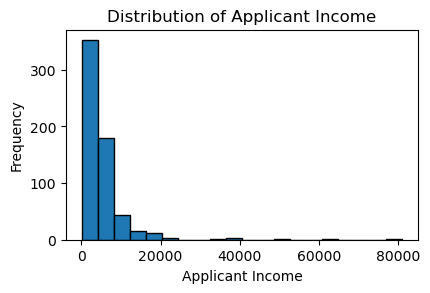

In [81]:
# Histogram for numerical features
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.hist(data['ApplicantIncome'], bins=20, edgecolor='black')
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

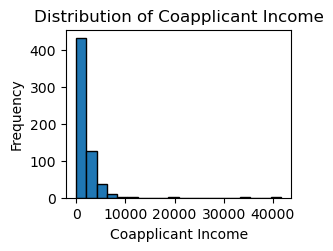

In [82]:
plt.subplot(2, 2, 2)
plt.hist(data['CoapplicantIncome'], bins=20, edgecolor='black')
plt.title('Distribution of Coapplicant Income')
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

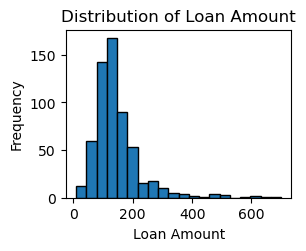

In [83]:
plt.subplot(2, 2, 3)
plt.hist(data['LoanAmount'], bins=20, edgecolor='black')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

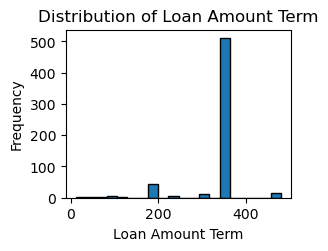

In [84]:
plt.subplot(2, 2, 4)
plt.hist(data['Loan_Amount_Term'], bins=20, edgecolor='black')
plt.title('Distribution of Loan Amount Term')
plt.xlabel('Loan Amount Term')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Count of Applicants by Property Area')

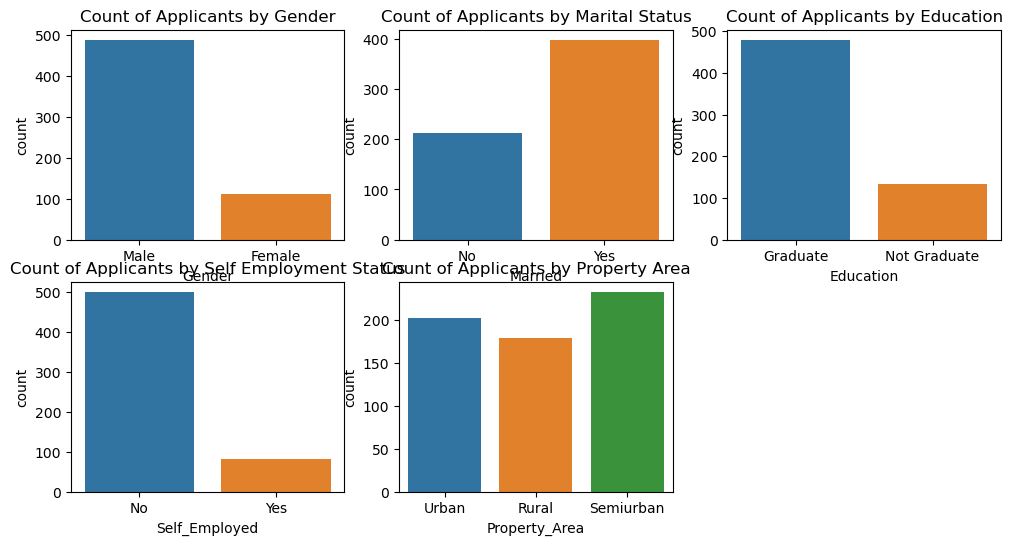

In [90]:
# Bar chart for categorical features
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.countplot(x='Gender', data=data)
plt.title('Count of Applicants by Gender')


plt.subplot(2, 3, 2)
sns.countplot(x='Married', data=data)
plt.title('Count of Applicants by Marital Status')

plt.subplot(2, 3, 3)
sns.countplot(x='Education', data=data)
plt.title('Count of Applicants by Education')



plt.subplot(2, 3, 4)
sns.countplot(x='Self_Employed', data=data)
plt.title('Count of Applicants by Self Employment Status')



plt.subplot(2, 3, 5)
sns.countplot(x='Property_Area', data=data)
plt.title('Count of Applicants by Property Area')

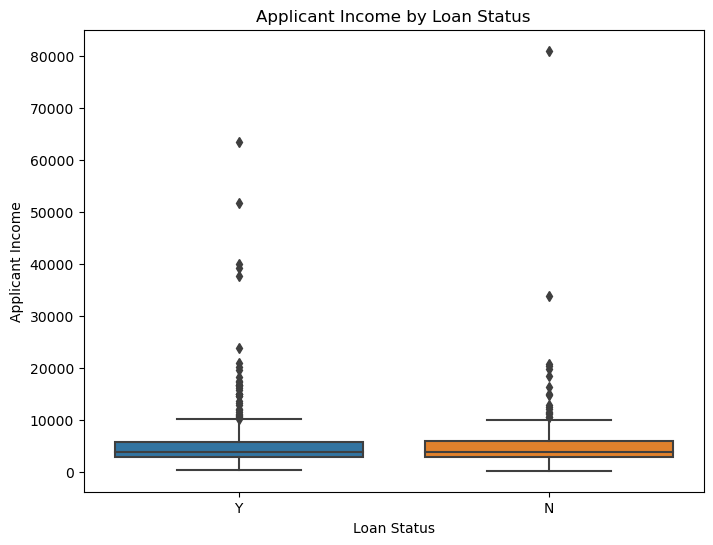

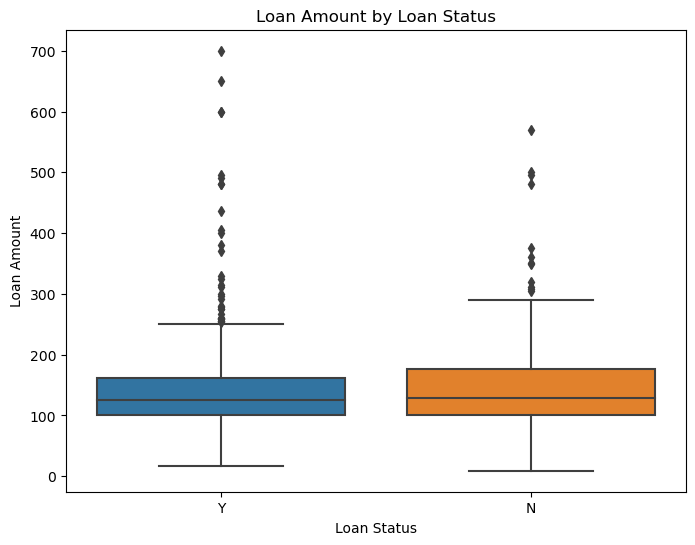

In [91]:
#Box plot for ApplicantIncome by Loan Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=data)
plt.title('Applicant Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.show()

#Box plot for LoanAmount by Loan Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=data)
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

C:\Users\namit\AppData\Local\Temp\ipykernel_5796\3211416714.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfcorr=data.corr()


<Axes: >

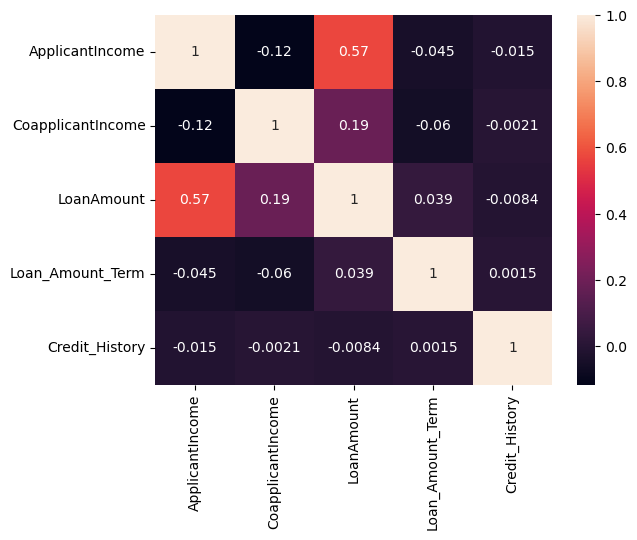

In [95]:
dfcorr=data.corr()

sns.heatmap(dfcorr,annot=True)



<Axes: xlabel='Property_Area', ylabel='count'>

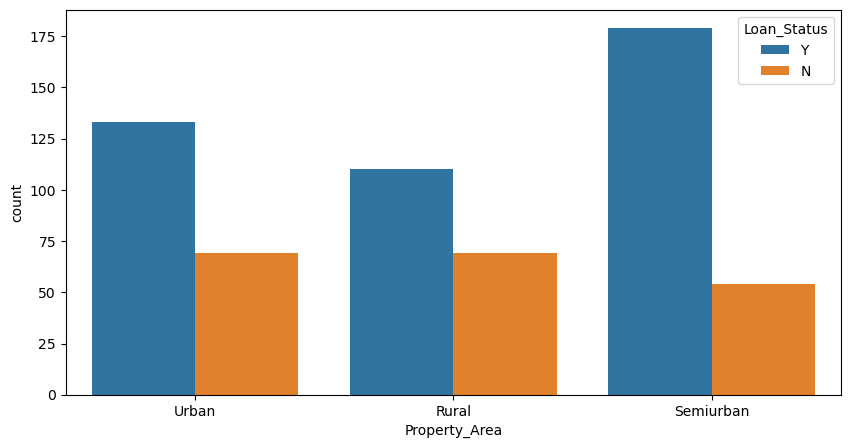

In [97]:

plt.figure(figsize=(10,5))
sns.countplot(x='Property_Area',hue='Loan_Status',data=data)

## 3. Using Label ENcoder for converting categorical to numerical

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [99]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Loan_ID            614 non-null    int32
 1   Gender             614 non-null    int32
 2   Married            614 non-null    int32
 3   Dependents         614 non-null    int32
 4   Education          614 non-null    int32
 5   Self_Employed      614 non-null    int32
 6   ApplicantIncome    614 non-null    int64
 7   CoapplicantIncome  614 non-null    int64
 8   LoanAmount         614 non-null    int64
 9   Loan_Amount_Term   614 non-null    int64
 10  Credit_History     614 non-null    int64
 11  Property_Area      614 non-null    int32
 12  Loan_Status        614 non-null    int32
dtypes: int32(8), int64(5)
memory usage: 43.3 KB


all columns are converted to numerical

### 2.4 Splitting into Test Data and Train Data

In [113]:
# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame containing the dataset
X = data.drop(['Loan_ID', 'Loan_Status'], axis=1)  # Features
y = data['Loan_Status']  # Target variable

# Splitting the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)  # Increase the maximum number of iterations
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)

## 4. Model Evaluation and Selection


In [120]:

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
}

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

# Evaluate each model using cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = scores.mean()

# Display the results
for name, score in results.items():
    print(f'{name}: Accuracy = {score:.4f}')

Logistic Regression: Accuracy = 0.8085
Decision Tree: Accuracy = 0.6741
Random Forest: Accuracy = 0.7942
Support Vector Machine: Accuracy = 0.6965
k-Nearest Neighbors: Accuracy = 0.6294
Gradient Boosting: Accuracy = 0.7718


Based on these accuracy scores, Logistic Regression has the highest accuracy among the models evaluated. However, it's important to consider other factors such as computational complexity, interpretability, and potential overfitting when selecting the best model for your problem.